# An experiment of document similarity

(20210330 Session)

References:

- https://medium.com/analytics-vidhya/fundamentals-of-bag-of-words-and-tf-idf-9846d301ff22
- https://nesoy.github.io/articles/2017-11/tf-idf
- https://gist.github.com/sebleier/554280
- https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [1]:
from collections import Counter
from math import log
import re

import seaborn as sns
import numpy as np
import pandas as pd

## Warming up: a bit of math

### Cosine function

![Cosine function](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/dfghkjhgfghjkj-1608140663.png)

### Dot product

${\displaystyle \mathbf {\color {red}a} \cdot \mathbf {\color {blue}b} =\sum _{i=1}^{n}{\color {red}a}_{i}{\color {blue}b}_{i}={\color {red}a}_{1}{\color {blue}b}_{1}+{\color {red}a}_{2}{\color {blue}b}_{2}+\cdots +{\color {red}a}_{n}{\color {blue}b}_{n}}$

${\displaystyle \mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos \theta ,}$

![vector visualization](https://upload.wikimedia.org/wikipedia/commons/3/3e/Dot_Product.svg)

## Example documents

In [2]:
documents = [
    "This pasta is very tasty and affordable.",
    "This pasta is not tasty and is affordable, but this pasta is very tasty and cheap.",
    "This is my review. This pasta is delicious and cheap.",
    "Pasta is tasty and pasta tastes good, but I prefer a hamburger to pasta.",
    "The affordable truck is driven on the road, and the car driver was eating something.",
    "The truck is driven on the highway. The truck driver was eating a hamburger.",
    "Did you see the car on the highway? I did not."
]

## Stop words

In [3]:
english_stop_words = set((
    "i",
    "me",
    "my",
    "myself",
    "we",
    "our",
    "ours",
    "ourselves",
    "you",
    "your",
    "yours",
    "yourself",
    "yourselves",
    "he",
    "him",
    "his",
    "himself",
    "she",
    "her",
    "hers",
    "herself",
    "it",
    "its",
    "itself",
    "they",
    "them",
    "their",
    "theirs",
    "themselves",
    "what",
    "which",
    "who",
    "whom",
    "this",
    "that",
    "these",
    "those",
    "am",
    "is",
    "are",
    "was",
    "were",
    "be",
    "been",
    "being",
    "have",
    "has",
    "had",
    "having",
    "do",
    "does",
    "did",
    "doing",
    "a",
    "an",
    "the",
    "and",
    "but",
    "if",
    "or",
    "because",
    "as",
    "until",
    "while",
    "of",
    "at",
    "by",
    "for",
    "with",
    "about",
    "against",
    "between",
    "into",
    "through",
    "during",
    "before",
    "after",
    "above",
    "below",
    "to",
    "from",
    "up",
    "down",
    "in",
    "out",
    "on",
    "off",
    "over",
    "under",
    "again",
    "further",
    "then",
    "once",
    "here",
    "there",
    "when",
    "where",
    "why",
    "how",
    "all",
    "any",
    "both",
    "each",
    "few",
    "more",
    "most",
    "other",
    "some",
    "such",
    "no",
    "nor",
    "not",
    "only",
    "own",
    "same",
    "so",
    "than",
    "too",
    "very",
    "s",
    "t",
    "can",
    "will",
    "just",
    "don",
    "should",
    "now",
))

## Preprocessing

- make each document all lower case
- split words
- remove stop words
- count words

In [4]:
document_word_counts = []
for d in documents:
    tokens = [t for t in re.split(r"\.| |,|\?", d.lower()) if t not in english_stop_words and t != ""]
    document_counter = Counter(tokens)
    document_word_counts.append(document_counter)

rows = [pd.Series(c) for c in document_word_counts]

## Bag of words

In [5]:
bow = pd.concat(rows, axis=1).transpose().fillna(0)
bow

,pasta,tasty,affordable,cheap,review,delicious,tastes,good,prefer,hamburger,truck,driven,road,car,driver,eating,something,highway,see
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## tf-idf

${\displaystyle \mathrm {tfidf} (t,d,D)=\mathrm {tf} (t,d)\cdot \mathrm {idf} (t,D)}$

- `t`
  - token / word
- `d`
  - document 
- `D`
  - set of all documents

- `tf`
  - Term frequency
  - https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Term_frequency_2
- `idf`
  - Inverse document frequency
  - https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency_2


In [6]:
n_words_in_document = bow.sum(axis=1)
tf = bow.divide(n_words_in_document, axis=0)
n_documents_containing_word = (bow > 0).sum()
n_documents_containing_word
idf = (len(documents) / n_documents_containing_word).apply(log)
tfidf = tf * idf
tfidf

,pasta,tasty,affordable,cheap,review,delicious,tastes,good,prefer,hamburger,truck,driven,road,car,driver,eating,something,highway,see
0,0.186539,0.282433,0.282433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.186539,0.282433,0.141216,0.208794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.139904,0.000000,0.000000,0.313191,0.486478,0.486478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.209856,0.105912,0.000000,0.000000,0.000000,0.000000,0.243239,0.243239,0.243239,0.156595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156595,0.156595,0.243239,0.156595,0.156595,0.156595,0.243239,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178966,0.357932,0.178966,0.000000,0.000000,0.178966,0.178966,0.000000,0.178966,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417588,0.000000,0.000000,0.000000,0.417588,0.648637


## Cosine similarity

${\displaystyle {\text{cosine similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}},}$

![Example 1](https://www.oreilly.com/library/view/mastering-machine-learning/9781785283451/assets/d258ae34-f4f8-4143-b3c2-0cb10f2b82de.png)
![Example 2](https://wikidocs.net/images/page/24603/%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84.PNG)

In [7]:
def cosine_similarity(doc_embeddings: pd.DataFrame):
    return np.array(
        [
            [
                (e1 * e2).sum() / ((e1 ** 2).sum() ** 0.5 * (e2 ** 2).sum() ** 0.5)
                for idx1, e1 in doc_embeddings.iterrows()
            ]
            for idx2, e2 in doc_embeddings.iterrows()
        ]
    )

<AxesSubplot:>

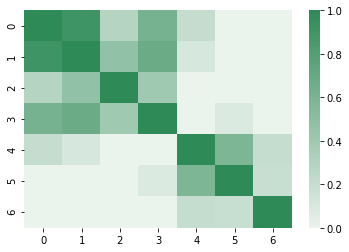

In [8]:
cmap = sns.light_palette("seagreen", as_cmap=True)
sim_bow = cosine_similarity(bow)
sns.heatmap(sim_bow, cmap=cmap)

<AxesSubplot:>

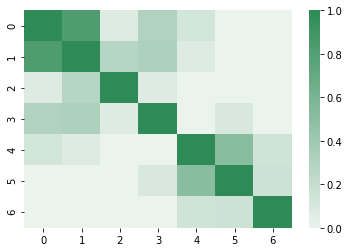

In [9]:
sim_tfidf = cosine_similarity(tfidf)
sns.heatmap(sim_tfidf, cmap=cmap)